<a href="https://colab.research.google.com/github/Isomorfismo/Deckout/blob/main/Deckout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **VISTA CASINO**

In [ ]:
import random
from collections import deque
from collections import Counter


# Definir los valores y los palos
valores = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
palos = ['Corazones', 'Diamantes', 'Treboles', 'Picas']

# Crear una función para ingresar manualmente las cartas
def ingresar_cartas():
    baraja = []
    print("Ingrese las cartas en formato 'valor palo' (por ejemplo, 'A Corazones'):")
    for _ in range(52):
        carta = input("Ingrese carta (o 'fin' para terminar): ")
        if carta.lower() == 'fin':
            break
        valor, palo = carta.split()
        if valor in valores and palo in palos:
            baraja.append((valor, palo))
        else:
            print("Entrada inválida, intente de nuevo.")
    return baraja

# Generar una baraja. 0 para aleatoria y 1 para ingresarla
#seleccion_baraja = input("Baraja aleatoria:0\nIngresar Baraja:1\n")
seleccion_baraja = '1'

if seleccion_baraja == '1':
  # Crear una pila y colocar las cartas en ella
  #pila = ingresar_cartas()
  pila = [
    ('A', 'Corazones'), ('2', 'Corazones'), ('3', 'Corazones'), ('4', 'Corazones'), ('5', 'Corazones'),
    ('6', 'Corazones'), ('7', 'Corazones'), ('8', 'Corazones'), ('9', 'Corazones'),
    ('10', 'Corazones'), ('J', 'Corazones'), ('Q', 'Corazones'), ('K', 'Corazones'), ('A', 'Corazones'),]

elif seleccion_baraja == '0':
    # Generar todas las combinaciones posibles de cartas
    baraja = [(valor, palo) for valor in valores for palo in palos]
    # Barajar las cartas
    random.shuffle(baraja)
    # Crear una pila y colocar las cartas en ella
    pila = []
    for carta in baraja:
        pila.append(carta)

# Crear una cola
cola = deque()
# Crear la cola "quemadas"
quemadas = deque()


# Función para verificar si es escalera
def es_escalera(valores_mano):
    # Crear un diccionario para mapear valores a índices
    indices = {valores[i]: i for i in range(len(valores))}
    indices_mano = sorted(indices[valor] for valor in valores_mano)

    # Verificar si los índices son consecutivos
    escalera_normal = all(indices_mano[i] + 1 == indices_mano[i + 1] for i in range(len(indices_mano) - 1))

    # Verificar la escalera especial A 2 3 4 5
    escalera_especial = indices_mano == [0, 1, 2, 3, 12]  # Índices correspondientes a A, 2, 3, 4, 5

    return escalera_normal or escalera_especial


# Función para analizar la cola y calcular puntos
def analizar_cola(cola):
    if len(cola) < 5:
        return 0  # No hay suficientes cartas para formar una tupla de 5

    # Obtener las últimas 5 cartas
    ultima_mano = list(cola)[-5:]
    valores_mano = [carta[0] for carta in ultima_mano]
    palos_mano = [carta[1] for carta in ultima_mano]

    # Contar las ocurrencias de cada valor y palo
    conteo_valores = Counter(valores_mano)
    conteo_palos = Counter(palos_mano)
    puntos = 0

    # Verificar combinaciones
    if 5 in conteo_valores.values():
        puntos += 10  # Quintilla (Imposible usando baraja aleatoria)
    elif sorted(valores_mano) == ['10', 'A', 'J', 'K', 'Q'] and len(set(palos_mano)) == 1:
        puntos += 9  # Flor Imperial
    elif len(set(palos_mano)) == 1 and es_escalera(valores_mano):
        puntos += 8  # Escalera de Color
    elif 4 in conteo_valores.values():
        puntos += 7  # Poker
    elif 3 in conteo_valores.values() and 2 in conteo_valores.values():
        puntos += 6  # Full House
    elif len(set(palos_mano)) == 1:
        puntos += 5  # Color
    elif es_escalera(valores_mano):
        puntos += 4  # Escalera
    elif 3 in conteo_valores.values():
        puntos += 3  # Tercia
    elif list(conteo_valores.values()).count(2) == 2:
        puntos += 2  # Doble Par
    elif 2 in conteo_valores.values():
        puntos += 1  # Par

    return puntos

# Imprimir la baraja barajada
def imprimir_baraja(baraja):
    print("\n////////////////Baraja:////////////////")
    cuenta = 1
    for carta in baraja:
        print(cuenta, carta)
        cuenta = cuenta + 1

def imprimir_quemadas(quemadas):
    print("\n----------Quemadas:----------")
    cuenta = 1
    for carta in quemadas:
        print(cuenta, carta)
        cuenta = cuenta + 1

# Función para mostrar la mano del jugador y los puntos
def mostrar_estado(cola, puntos):
    print("\n==++==++==++==++Mano:==++==++==++==++")
    for carta in cola:
        print(carta)
    print("\nTotal de puntos:", puntos)

# Hacer pop a los primeros 5 elementos de la pila y añadirlos a la cola
for _ in range(5):
    if pila:
        carta = pila.pop()
        cola.append(carta)

# Contador de puntos
total_puntos = analizar_cola(cola)
puntos_acumulados = [total_puntos]  # Lista para almacenar los puntos acumulados

# Mostrar la mano inicial, puntos y turno 0
if seleccion_baraja == '1':
    imprimir_baraja(pila)
elif seleccion_baraja == '0':
    imprimir_baraja(baraja)
turno = 0
print("...............................Turno:", turno,"................................................................")
imprimir_baraja(pila)
mostrar_estado(cola, total_puntos)
imprimir_quemadas(quemadas)

while pila:
    # Hacer dequeue a un elemento de la cola y moverlo a la cola "quemadas"
    if cola:
        carta = cola.popleft()
        quemadas.append(carta)

    # Hacer un nuevo pop del stack y añadirlo a la primera cola
    if pila:
        carta = pila.pop()
        cola.append(carta)
        total_puntos += analizar_cola(cola)
        puntos_acumulados.append(total_puntos)  # Almacenar los puntos acumulados


    # Mostrar la nueva mano y puntos
    turno = turno + 1
    print("...............................Turno:", turno,"................................................................")
    imprimir_baraja(pila)
    mostrar_estado(cola, total_puntos)
    imprimir_quemadas(quemadas)

# Mostrar el resultado final cuando ya no se pueda hacer un pop del stack
print("\nNo hay más cartas en la baraja.")
print("Resultado final:")
mostrar_estado(cola, total_puntos)


////////////////Baraja:////////////////
1 ('A', 'Corazones')
2 ('2', 'Corazones')
3 ('3', 'Corazones')
4 ('4', 'Corazones')
5 ('5', 'Corazones')
6 ('6', 'Corazones')
7 ('7', 'Corazones')
8 ('8', 'Corazones')
9 ('9', 'Corazones')
...............................Turno: 0 ................................................................

////////////////Baraja:////////////////
1 ('A', 'Corazones')
2 ('2', 'Corazones')
3 ('3', 'Corazones')
4 ('4', 'Corazones')
5 ('5', 'Corazones')
6 ('6', 'Corazones')
7 ('7', 'Corazones')
8 ('8', 'Corazones')
9 ('9', 'Corazones')

==++==++==++==++Mano:==++==++==++==++
('A', 'Corazones')
('K', 'Corazones')
('Q', 'Corazones')
('J', 'Corazones')
('10', 'Corazones')

Total de puntos: 9

----------Quemadas:----------
...............................Turno: 1 ................................................................

////////////////Baraja:////////////////
1 ('A', 'Corazones')
2 ('2', 'Corazones')
3 ('3', 'Corazones')
4 ('4', 'Corazones')
5 ('5', 'Corazones'

[9, 17, 25, 33, 41, 49, 57, 65, 73, 81]
Puntos Totales: 81


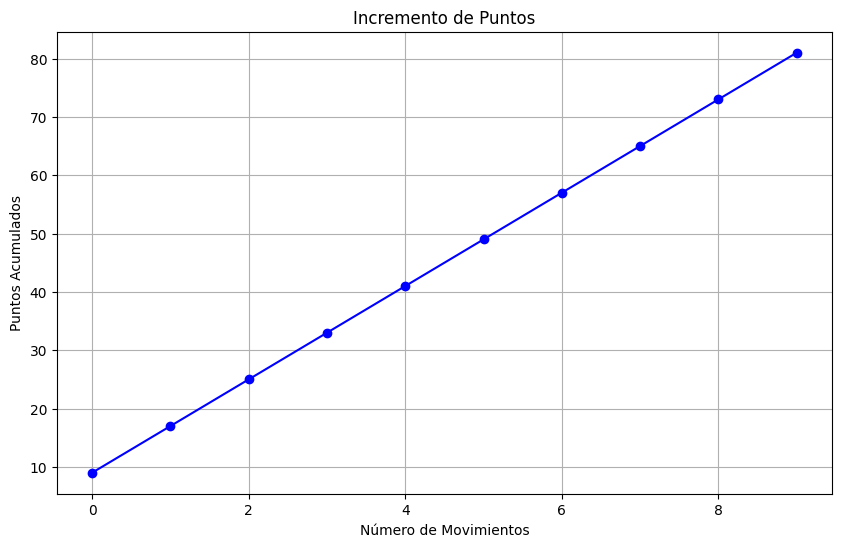

In [ ]:
import matplotlib.pyplot as plt
# Guardar los puntos acumulados en una lista para su posterior uso en la gráfica
print(puntos_acumulados)
print("Puntos Totales:", total_puntos)
# Generar la gráfica de la función de distribución acumulada
plt.figure(figsize=(10, 6))
plt.plot(puntos_acumulados, marker='o', linestyle='-', color='b')
plt.title('Incremento de Puntos')
plt.xlabel('Número de Movimientos')
plt.ylabel('Puntos Acumulados')
plt.grid(True)
plt.show()

# ***VISTA JUGADOR***

In [ ]:
import random
from collections import deque, Counter
import os
from IPython.display import clear_output
import time

# Definir los valores y los palos
valores = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
palos = ['Corazones', 'Diamantes', 'Treboles', 'Picas']

# Crear una función para ingresar manualmente las cartas
def ingresar_cartas():
    baraja = []
    print("Ingrese las cartas en formato 'valor palo' (por ejemplo, 'A Corazones'):")
    for _ in range(52):
        carta = input("Ingrese carta (o 'fin' para terminar): ")
        if carta.lower() == 'fin':
            break
        valor, palo = carta.split()
        if valor in valores and palo in palos:
            baraja.append((valor, palo))
        else:
            print("Entrada inválida, intente de nuevo.")
    return baraja

# Generar todas las combinaciones posibles de cartas
baraja = [(valor, palo) for valor in valores for palo in palos]

# Barajar las cartas
random.shuffle(baraja)

# Crear una pila y colocar las cartas en ella
pila = []
for carta in baraja:
    pila.append(carta)

# Crear una cola
cola = deque()

# Crear la cola "quemadas"
quemadas = deque()

# Función para verificar si es escalera
def es_escalera(valores_mano):
    # Crear un diccionario para mapear valores a índices
    indices = {valores[i]: i for i in range(len(valores))}
    indices_mano = sorted(indices[valor] for valor in valores_mano)

    # Verificar si los índices son consecutivos
    escalera_normal = all(indices_mano[i] + 1 == indices_mano[i + 1] for i in range(len(indices_mano) - 1))

    # Verificar la escalera especial A 2 3 4 5
    escalera_especial = indices_mano == [0, 1, 2, 3, 12]  # Índices correspondientes a A, 2, 3, 4, 5

    return escalera_normal or escalera_especial


# Función para analizar la cola y calcular puntos
def analizar_cola(cola):
    if len(cola) < 5:
        return 0  # No hay suficientes cartas para formar una tupla de 5

    # Obtener las últimas 5 cartas
    ultima_mano = list(cola)[-5:]
    valores_mano = [carta[0] for carta in ultima_mano]
    palos_mano = [carta[1] for carta in ultima_mano]

    # Contar las ocurrencias de cada valor y palo
    conteo_valores = Counter(valores_mano)
    conteo_palos = Counter(palos_mano)
    puntos = 0

    # Verificar combinaciones
    if 5 in conteo_valores.values():
        puntos += 10  # Quintilla
    elif sorted(valores_mano) == ['10', 'A', 'J', 'K', 'Q'] and len(set(palos_mano)) == 1:
        puntos += 9  # Flor Imperial
    elif len(set(palos_mano)) == 1 and es_escalera(valores_mano):
        puntos += 8  # Escalera de Color
    elif 4 in conteo_valores.values():
        puntos += 7  # Poker
    elif 3 in conteo_valores.values() and 2 in conteo_valores.values():
        puntos += 6  # Full House
    elif len(set(palos_mano)) == 1:
        puntos += 5  # Color
    elif es_escalera(valores_mano):
        puntos += 4  # Escalera
    elif 3 in conteo_valores.values():
        puntos += 3  # Tercia
    elif list(conteo_valores.values()).count(2) == 2:
        puntos += 2  # Doble Par
    elif 2 in conteo_valores.values():
        puntos += 1  # Par

    return puntos

# Función para limpiar la pantalla
def limpiar_pantalla():
    if os.name == 'nt':  # Para Windows
        os.system('cls')
    else:  # Para Unix/MacOS
        os.system('clear')
        clear_output()

# Función para mostrar la mano del jugador y los puntos
def mostrar_estado(cola, puntos):
    print("\nMano:")
    for carta in cola:
        print(carta)
    print("\nTotal de puntos:", puntos)

# Hacer pop a los primeros 5 elementos de la pila y añadirlos a la cola
for _ in range(5):
    if pila:
        carta = pila.pop()
        cola.append(carta)

# Contador de puntos
total_puntos = analizar_cola(cola)
puntos_acumulados = [total_puntos]  # Lista para almacenar los puntos acumulados

# Mostrar la mano inicial, puntos y turno 0
mostrar_estado(cola, total_puntos)
turno = 0
print("Turno:", turno)

while pila:
    input("\nPresiona Enter para continuar...")
    #time.sleep(3)
    limpiar_pantalla()

    # Hacer dequeue a un elemento de la cola y moverlo a la cola "quemadas"
    if cola:
        carta = cola.popleft()
        quemadas.append(carta)

    # Hacer un nuevo pop del stack y añadirlo a la primera cola
    if pila:
        carta = pila.pop()
        cola.append(carta)
        total_puntos += analizar_cola(cola)
        puntos_acumulados.append(total_puntos)  # Almacenar los puntos acumulados


    # Mostrar la nueva mano y puntos
    mostrar_estado(cola, total_puntos)
    turno = turno + 1
    print("Turno:", turno)

# Mostrar el resultado final cuando ya no se pueda hacer un pop del stack
print("\nNo hay más cartas en la baraja.")
print("Resultado final:")
mostrar_estado(cola, total_puntos)

# **ANÁLISIS**

In [ ]:
import random
from collections import deque, Counter
import numpy as np

# Definir los valores y los palos
valores = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
palos = ['Corazones', 'Diamantes', 'Treboles', 'Picas']

# Generar todas las combinaciones posibles de cartas
baraja = [(valor, palo) for valor in valores for palo in palos]

# Función para verificar si es escalera
def es_escalera(valores_mano):
    indices = {valores[i]: i for i in range(len(valores))}
    indices_mano = sorted(indices[valor] for valor in valores_mano)

    escalera_normal = all(indices_mano[i] + 1 == indices_mano[i + 1] for i in range(len(indices_mano) - 1))
    escalera_especial = indices_mano == [0, 1, 2, 3, 12]  # Índices correspondientes a A, 2, 3, 4, 5

    return escalera_normal or escalera_especial

# Función para analizar la cola y calcular puntos
def analizar_cola(cola):
    if len(cola) < 5:
        return 0, ""

    ultima_mano = list(cola)[-5:]
    valores_mano = [carta[0] for carta in ultima_mano]
    palos_mano = [carta[1] for carta in ultima_mano]

    conteo_valores = Counter(valores_mano)
    conteo_palos = Counter(palos_mano)
    puntos = 0
    combinacion = "Nada"

    if 5 in conteo_valores.values():
        puntos += 10
        combinacion = "Quintilla"
    elif 4 in conteo_valores.values():
        puntos += 6
        combinacion = "Poker"
    elif sorted(valores_mano) == ['10', 'A', 'J', 'K', 'Q'] and len(set(palos_mano)) == 1:
        puntos += 9
        combinacion = "Flor Imperial"
    elif len(set(palos_mano)) == 1 and es_escalera(valores_mano):
        puntos += 8
        combinacion = "Escalera de Color"
    elif 3 in conteo_valores.values() and 2 in conteo_valores.values():
        puntos += 7
        combinacion = "Full House"
    elif len(set(palos_mano)) == 1:
        puntos += 5
        combinacion = "Color"
    elif es_escalera(valores_mano):
        puntos += 4
        combinacion = "Escalera"
    elif 3 in conteo_valores.values():
        puntos += 3
        combinacion = "Tercia"
    elif list(conteo_valores.values()).count(2) == 2:
        puntos += 2
        combinacion = "Doble Par"
    elif 2 in conteo_valores.values():
        puntos += 1
        combinacion = "Par"

    return puntos, combinacion

# Función para simular un juego
def simular_juego():
    random.shuffle(baraja)
    pila = list(baraja)
    cola = deque()
    quemadas = deque()

    for _ in range(5):
        if pila:
            carta = pila.pop()
            cola.append(carta)

    total_puntos, combinacion = analizar_cola(cola)
    puntos_acumulados = [total_puntos]
    combinaciones = [combinacion]

    while pila:
        if cola:
            carta = cola.popleft()
            quemadas.append(carta)

        if pila:
            carta = pila.pop()
            cola.append(carta)
            puntos, combinacion = analizar_cola(cola)
            total_puntos += puntos
            puntos_acumulados.append(total_puntos)
            combinaciones.append(combinacion)

    return puntos_acumulados, combinaciones

# Calcular RTP
def calcular_rtp(ganancias, apuesta):
    return (sum(ganancias) / apuesta)/100

# Simular múltiples juegos
num_simulaciones = 1000000
resultados = [simular_juego() for _ in range(num_simulaciones)]

# Extraer el último punto de cada simulación para obtener el total de puntos final
puntos_finales = [juego[0][-1] for juego in resultados]


# Calcular estadísticas descriptivas
media_puntos = np.mean(puntos_finales)
mediana_puntos = np.median(puntos_finales)
desviacion_estandar_puntos = np.std(puntos_finales)

# Guardar los puntos acumulados y las estadísticas para uso en otra celda
puntos_acumulados = [juego[0] for juego in resultados]
estadisticas_puntos = {
    'media': media_puntos,
    'mediana': mediana_puntos,
    'desviacion_estandar/volatilidad': desviacion_estandar_puntos,
    'puntos_finales': puntos_finales
}

# Guardar la frecuencia de cada combinación de puntos
combinaciones_todas = [combinacion for juego in resultados for combinacion in juego[1]]
conteo_combinaciones = Counter(combinaciones_todas)

# Asegurarse de que todas las combinaciones esten presentes en el conteo
todas_combinaciones = ["Nada", "Par", "Doble Par", "Tercia", "Escalera", "Color", "Full House", "Poker", "Escalera de Color", "Flor Imperial", "Quintilla"]
frecuencias_combinaciones = {comb: conteo_combinaciones.get(comb, 0) for comb in todas_combinaciones}

#Calcular RTP
apuesta = 30  # Suponiendo una apuesta fija para cada partida
rtp = {'rtp': calcular_rtp(puntos_finales, apuesta)}

# Mostrar las estadísticas y frecuencias
estadisticas_puntos, frecuencias_combinaciones, rtp

({'media': 29.677384,
  'mediana': 29.0,
  'desviacion_estandar/volatilidad': 8.814352098512064,
  'puntos_finales': [50,
   43,
   30,
   32,
   31,
   31,
   18,
   30,
   32,
   40,
   30,
   50,
   35,
   42,
   26,
   29,
   19,
   29,
   40,
   23,
   40,
   36,
   41,
   27,
   22,
   38,
   36,
   31,
   23,
   28,
   23,
   34,
   29,
   34,
   21,
   27,
   40,
   27,
   27,
   27,
   21,
   27,
   32,
   28,
   42,
   24,
   38,
   27,
   21,
   24,
   26,
   29,
   23,
   23,
   53,
   23,
   22,
   31,
   41,
   31,
   26,
   25,
   25,
   36,
   40,
   21,
   18,
   43,
   28,
   28,
   30,
   30,
   29,
   44,
   23,
   22,
   21,
   32,
   37,
   32,
   25,
   26,
   16,
   27,
   50,
   21,
   35,
   24,
   38,
   29,
   37,
   21,
   19,
   34,
   29,
   30,
   43,
   14,
   21,
   25,
   18,
   32,
   37,
   25,
   34,
   27,
   31,
   22,
   43,
   24,
   29,
   29,
   23,
   26,
   35,
   33,
   20,
   19,
   20,
   35,
   24,
   24,
   30,
   14,
   26,
   29,
   

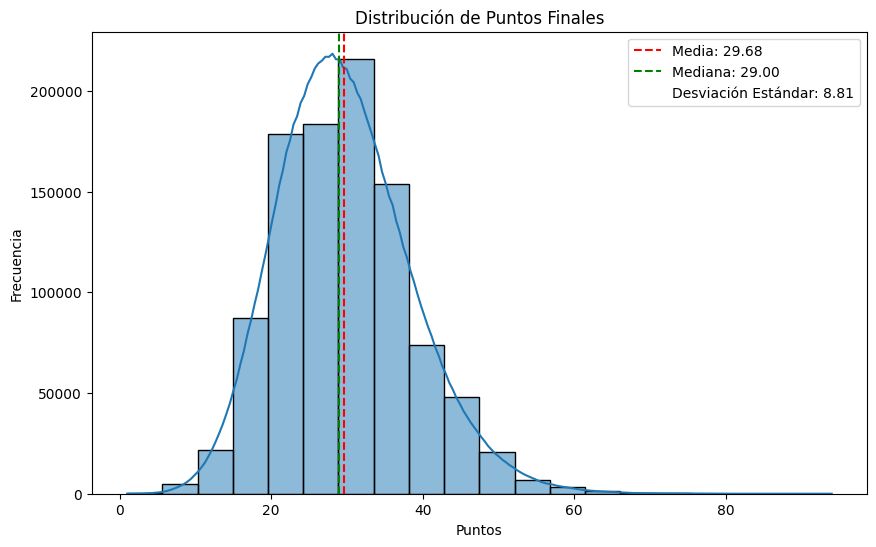

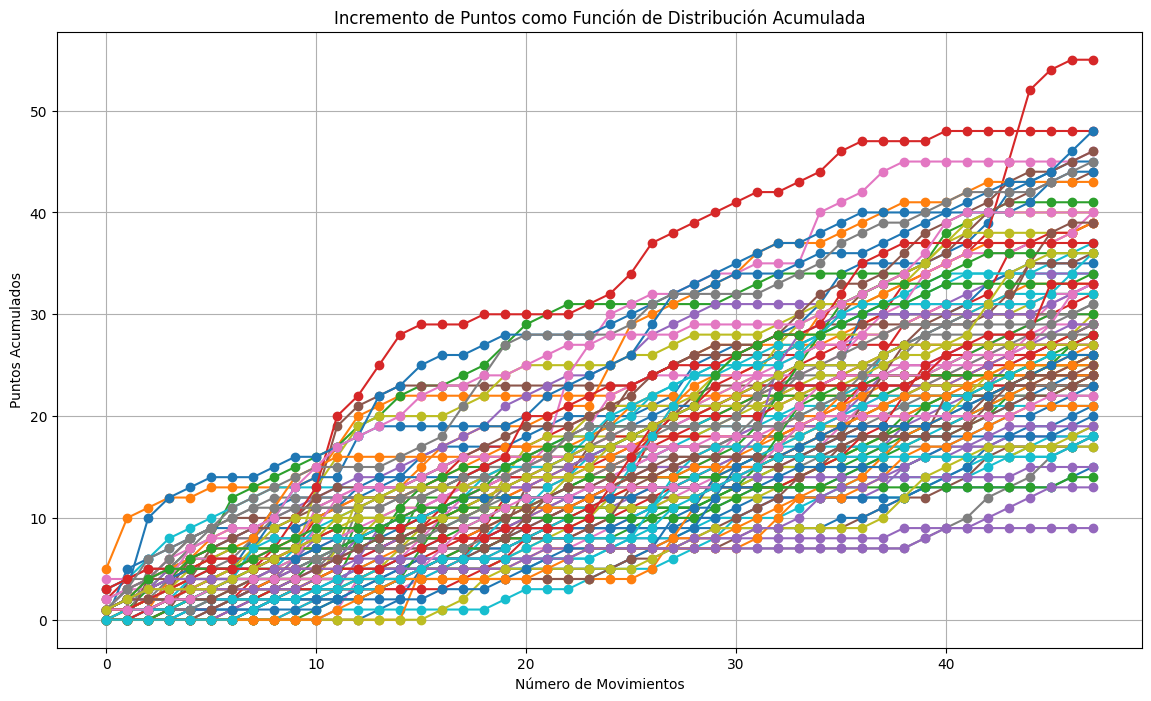

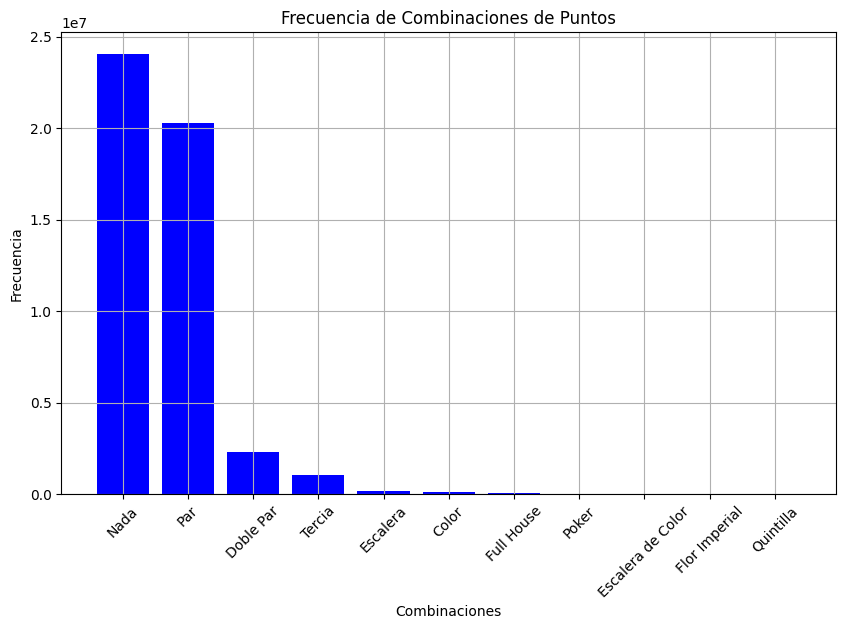

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Recuperar datos de la celda anterior
puntos_acumulados = puntos_acumulados  # Lista de listas con puntos acumulados de cada simulación
estadisticas_puntos = estadisticas_puntos  # Diccionario con media, mediana, desviacion_estandar, puntos_finales
frecuencias_combinaciones = frecuencias_combinaciones  # Diccionario con la frecuencia de cada combinación de puntos

# Extraer estadísticas
media_puntos = estadisticas_puntos['media']
mediana_puntos = estadisticas_puntos['mediana']
desviacion_estandar_puntos = estadisticas_puntos['desviacion_estandar/volatilidad']
puntos_finales = estadisticas_puntos['puntos_finales']

# Graficar la distribución de puntos finales
plt.figure(figsize=(10, 6))
sns.histplot(puntos_finales, bins=20, kde=True)
plt.title('Distribución de Puntos Finales')
plt.xlabel('Puntos')
plt.ylabel('Frecuencia')
plt.axvline(media_puntos, color='r', linestyle='--', label=f'Media: {media_puntos:.2f}')
plt.axvline(mediana_puntos, color='g', linestyle='--', label=f'Mediana: {mediana_puntos:.2f}')

# Crea una leyenda personalizada incluyendo la desviación estándar
handles, labels = plt.gca().get_legend_handles_labels()
# Agrega un objeto vacío para la desviación estándar
handles.append(plt.Line2D([], [], color='none', label=f'Desviación Estándar: {desviacion_estandar_puntos:.2f}'))
plt.legend(handles=handles)
plt.show()

# Graficar la función de distribución acumulada de múltiples simulaciones
simulaciones_a_graficar = 100  # Número de simulaciones que quieres graficar
# Seleccionar 100 índices aleatorios sin reemplazo
indices_aleatorios = random.sample(range(num_simulaciones), simulaciones_a_graficar)

plt.figure(figsize=(14, 8))  # Ajustar el tamaño de la figura para acomodar mejor las líneas
for i in indices_aleatorios:
    plt.plot(puntos_acumulados[i], marker='o', linestyle='-')#, label=f'Simulación {i+1}')
plt.title('Incremento de Puntos como Función de Distribución Acumulada')
plt.xlabel('Número de Movimientos')
plt.ylabel('Puntos Acumulados')
plt.grid(True)
plt.show()

# Graficar la frecuencia de combinaciones de puntos
plt.figure(figsize=(10, 6))
plt.bar(frecuencias_combinaciones.keys(), frecuencias_combinaciones.values(), color='b')
plt.title('Frecuencia de Combinaciones de Puntos')
plt.xlabel('Combinaciones')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()